
# Medical Insurance Price Prediction

## Data preprocessing

### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Loading the dataset

In [2]:
# Dataset Link: https://www.kaggle.com/code/mariapushkareva/medical-insurance-cost-with-linear-regression/input
data = pd.read_csv("Medical_insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,2772.0,39.109668,14.081459,18.0000,26.000,39.00000,51.0000,64.00000
bmi,2772.0,30.701349,6.129449,15.9600,26.220,30.44750,34.7700,53.13000
children,2772.0,1.101732,1.214806,0.0000,0.000,1.00000,2.0000,5.00000
charges,2772.0,13261.369959,12151.768945,1121.8739,4687.797,9333.01435,16577.7795,63770.42801


#### Data cleaning

In [5]:
# checking for the duplicates
data.duplicated().sum()

1435

In [6]:
# Too many duuplicate values are there. Need to drop it
data.drop_duplicates(inplace=True)

In [7]:
data.shape

(1337, 7)

After removing duplicates, 2772 entries gets down to 1337 

In [8]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There is no null values

In [9]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Encooding the categorical values in the data set

### Exploratory Data Analysis

#### Univariate Analysis

In [10]:
univariate_list = ['age', 'bmi', 'charges']

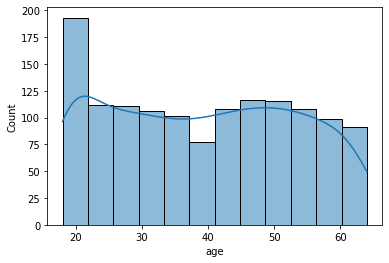

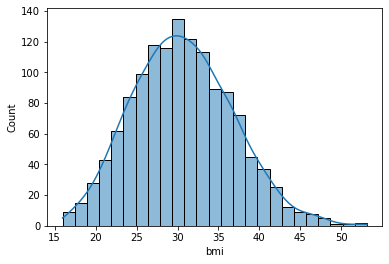

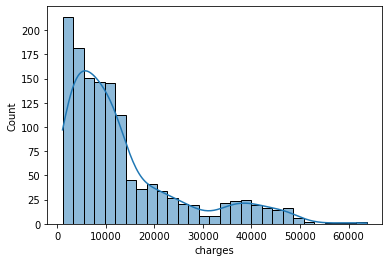

In [11]:
for i in univariate_list:
    sns.histplot(data[i], kde=True)
    plt.show()

Charges column is positively skewed. It may have lot of outliers in it. Lets find in detail by using boxplot

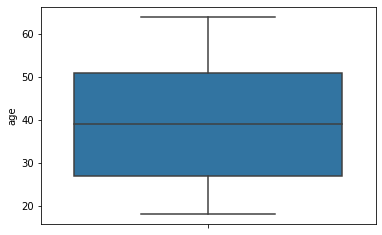

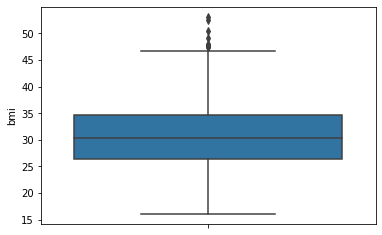

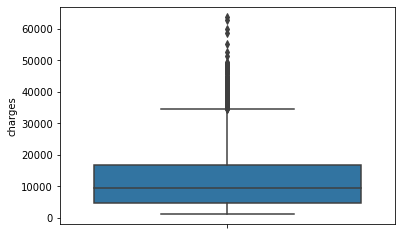

In [12]:
# Box plots
for i in univariate_list:
    sns.boxplot(y=data[i])
    plt.show()

There are outliers present in bmi and charges columns. We need to remove them

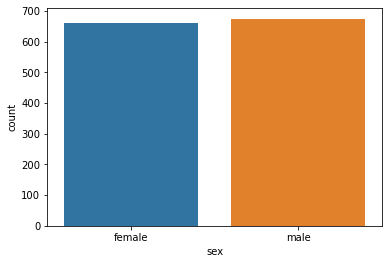

In [13]:
# Count plot
sns.countplot(data=data, x='sex')
plt.show()
# Number of males and females are almost same

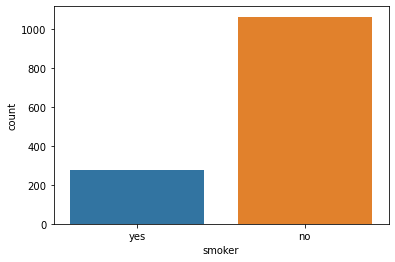

In [14]:
sns.countplot(data=data, x='smoker')
plt.show()
# Non smokers are more than smokers 

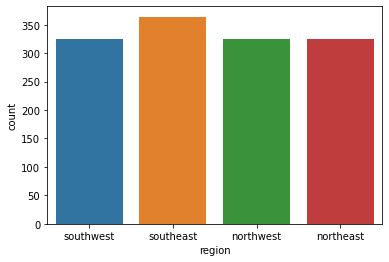

In [15]:
sns.countplot(data=data, x='region')
plt.show()
# Customers is more from southeast region, rest all around same range

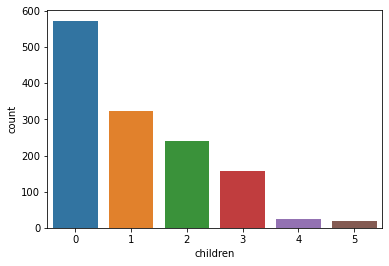

In [16]:
sns.countplot(data=data, x='children')
plt.show()

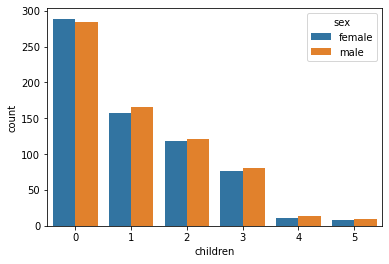

In [17]:
sns.countplot(data=data, x='children', hue = 'sex')
plt.show()

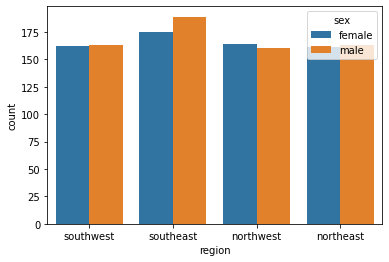

In [18]:
sns.countplot(data=data, x='region', hue = 'sex')
plt.show()

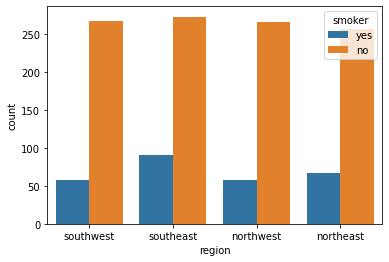

In [19]:
sns.countplot(data=data, x='region', hue = 'smoker')
plt.show()

#### Multivariate Analysis

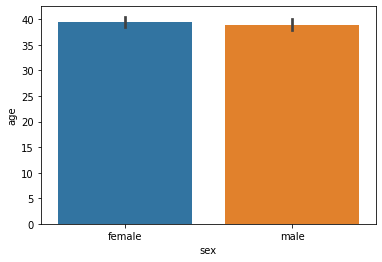

In [20]:
sns.barplot(data=data, x='sex', y='age')
plt.show()
# Averge age of female is slightly greater than males

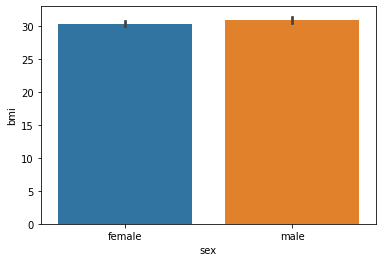

In [21]:
sns.barplot(data=data, x='sex', y='bmi')
plt.show()
# Averge bmi of males is slightly greater than females

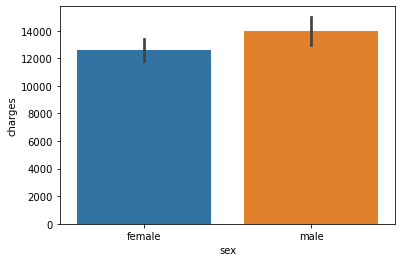

In [22]:
sns.barplot(data=data, x='sex', y='charges')
plt.show()
# Average charges for males is more than females

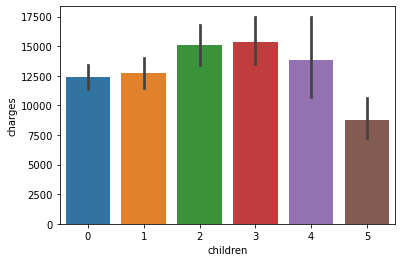

In [23]:
sns.barplot(data=data, x='children', y='charges')
plt.show()

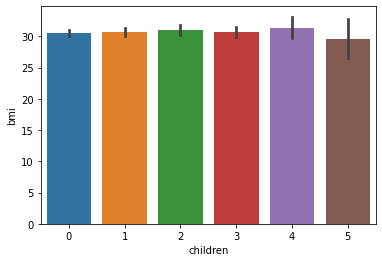

In [24]:
sns.barplot(data=data, x='children', y='bmi')
plt.show()

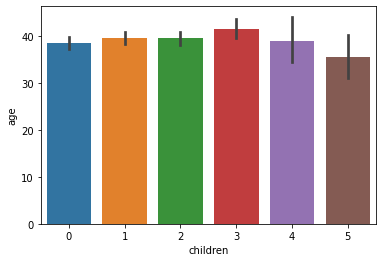

In [25]:
sns.barplot(data=data, x='children', y='age')
plt.show()

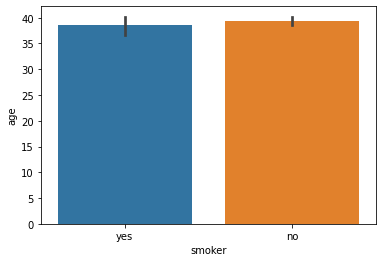

In [26]:
sns.barplot(data=data, x='smoker', y='age')
plt.show()

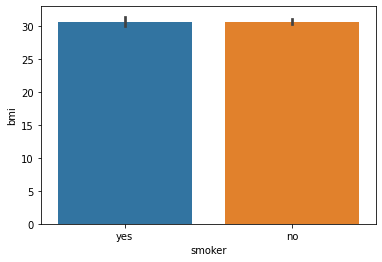

In [27]:
sns.barplot(data=data, x='smoker', y='bmi')
plt.show()

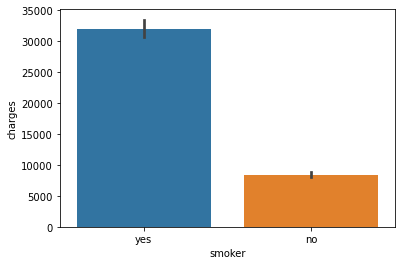

In [28]:
sns.barplot(data=data, x='smoker', y='charges')
plt.show()
# Charges for smokers are more 

In [29]:
# Line plot
data_age = data.sort_values(by='age')
data_age

,age,sex,bmi,children,smoker,region,charges
866,18,male,37.290,0,no,southeast,1141.44510
911,18,male,31.730,0,yes,northeast,33732.68670
1248,18,female,39.820,0,no,southeast,1633.96180
781,18,male,41.140,0,no,southeast,1146.79660
600,18,female,39.160,0,no,southeast,1633.04440
...,...,...,...,...,...,...,...
1241,64,male,36.960,2,yes,southeast,49577.66240
378,64,female,30.115,3,no,northwest,16455.70785
752,64,male,37.905,0,no,northwest,14210.53595
335,64,male,34.500,0,no,southwest,13822.80300


In [30]:
data_age = data_age.reset_index()
data_age

,index,age,sex,bmi,children,smoker,region,charges
0,866,18,male,37.290,0,no,southeast,1141.44510
1,911,18,male,31.730,0,yes,northeast,33732.68670
2,1248,18,female,39.820,0,no,southeast,1633.96180
3,781,18,male,41.140,0,no,southeast,1146.79660
4,600,18,female,39.160,0,no,southeast,1633.04440
...,...,...,...,...,...,...,...,...
1332,1241,64,male,36.960,2,yes,southeast,49577.66240
1333,378,64,female,30.115,3,no,northwest,16455.70785
1334,752,64,male,37.905,0,no,northwest,14210.53595
1335,335,64,male,34.500,0,no,southwest,13822.80300


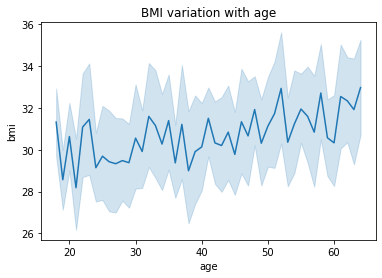

In [31]:
sns.lineplot(data=data_age, x='age', y='bmi')
plt.title("BMI variation with age")
plt.show()

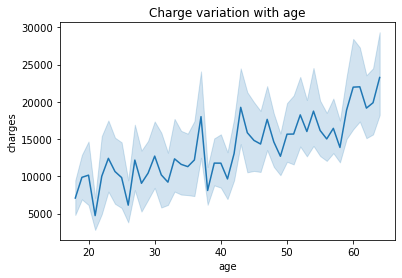

In [32]:
sns.lineplot(data=data_age, x='age', y='charges')
plt.title("Charge variation with age")
plt.show()

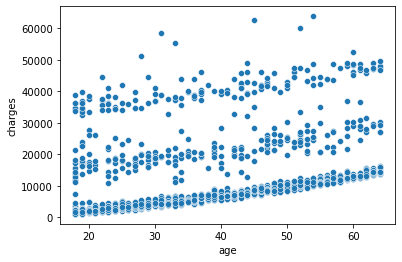

In [33]:
# Scatter plot
sns.scatterplot(data=data, x='age', y='charges')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

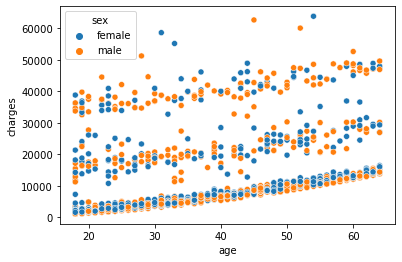

In [34]:
sns.scatterplot(data=data, x='age', y='charges', hue='sex')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

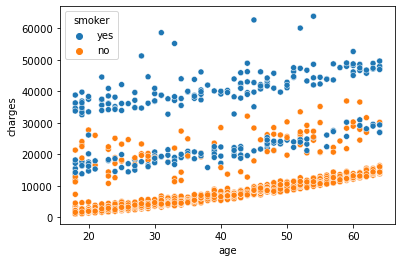

In [35]:
sns.scatterplot(data=data, x='age', y='charges', hue='smoker')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

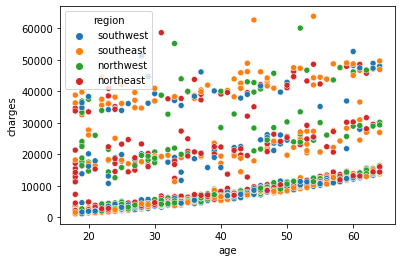

In [36]:
sns.scatterplot(data=data, x='age', y='charges', hue='region')
plt.show

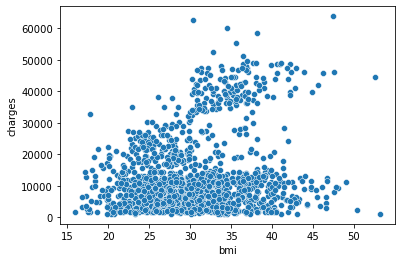

In [37]:
sns.scatterplot(data=data, x='bmi', y='charges')
plt.show()

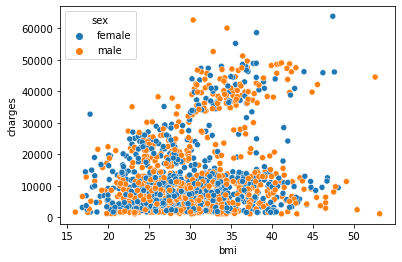

In [38]:
sns.scatterplot(data=data, x='bmi', y='charges', hue='sex')
plt.show()

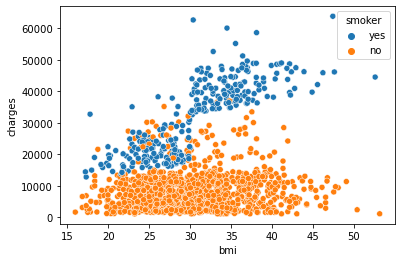

In [39]:
sns.scatterplot(data=data, x='bmi', y='charges', hue='smoker')
plt.show()

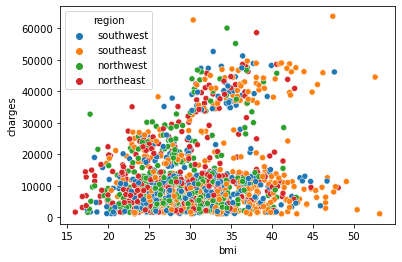

In [40]:
sns.scatterplot(data=data, x='bmi', y='charges', hue='region')
plt.show()

### Treating outliers - IQR Method

In [41]:
def outlier_limt(col):
    Q3, Q1 = np.nanpercentile(col,[75, 25])
    IQR = Q3 - Q1
    UL = Q3 + 1.5*IQR
    LL = Q1 - 1.5*IQR
    return UL, LL

In [42]:
for i in univariate_list:
    UL, LL = outlier_limt(data[i])
    data[i] = np.where((data[i]>UL) | (data[i]<LL), np.nan, data[i])

In [43]:
data.isnull().sum()

age           0
sex           0
bmi           9
children      0
smoker        0
region        0
charges     139
dtype: int64

There are 9 outliers in BMI column and 139 outliers in charges column. Let's remove it

In [44]:
data.dropna(inplace=True)

In [45]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


### Checking the outliers again

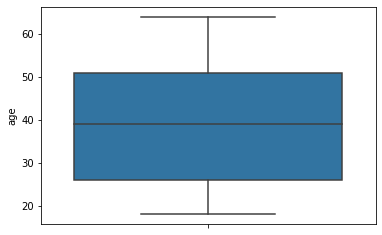

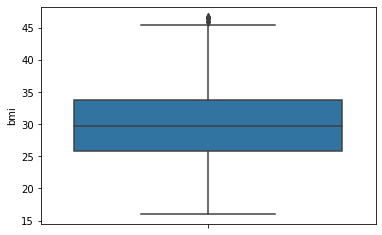

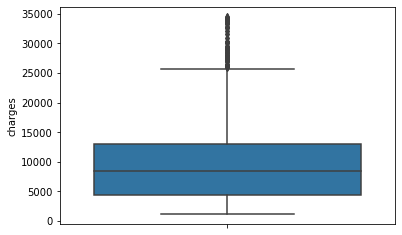

In [46]:
for i in univariate_list:
    sns.boxplot(y = data[i])
    plt.show()

Effect of outliers have reduced

### Encoding the categorical  values

In [47]:
# Encoding the sex column
data.sex.value_counts()

female    611
male      581
Name: sex, dtype: int64

In [48]:
data.replace({"male":0, "female":1}, inplace=True)

In [49]:
# Encoding smoker column
data.smoker.value_counts()

no     1054
yes     138
Name: smoker, dtype: int64

In [50]:
data.replace({"no":0, "yes":1}, inplace=True)

In [51]:
# Encoding the region column
data.region.value_counts()

northwest    304
southeast    302
northeast    295
southwest    291
Name: region, dtype: int64

In [52]:
data.replace({"southeast":0, "southwest":1, "northwest":2, "northeast":3}, inplace=True)

### Checking the correlation

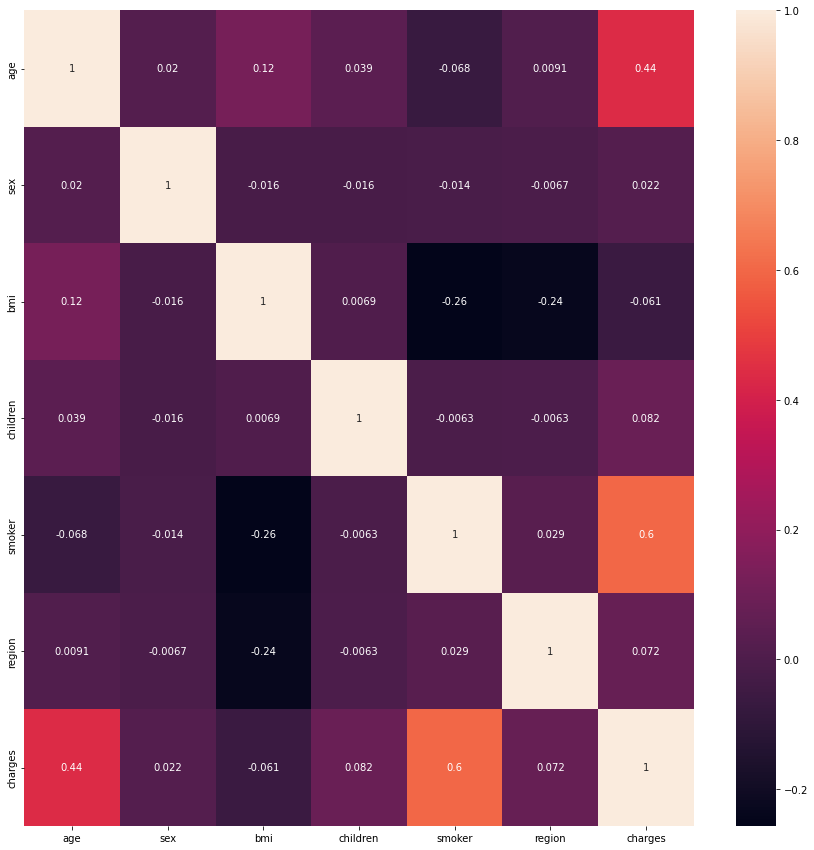

In [53]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True)
plt.show()

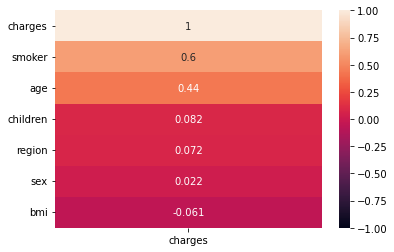

In [54]:
sns.heatmap(data.corr()[['charges']].sort_values(by='charges', ascending=False), vmin=-1, vmax=1, annot=True)
plt.show()

Smoker and age columns having the positive correlation with the charges. So lets need to select only them

In [55]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [56]:
data = data[['age', 'smoker', 'charges']].copy()
data

,age,smoker,charges
0,19.0,1,16884.92400
1,18.0,0,1725.55230
2,28.0,0,4449.46200
3,33.0,0,21984.47061
4,32.0,0,3866.85520
...,...,...,...
1333,50.0,0,10600.54830
1334,18.0,0,2205.98080
1335,18.0,0,1629.83350
1336,21.0,0,2007.94500


In [57]:
# Splitting data set in to input and output variables
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
print(X), print(y)

[[19.  1.]
 [18.  0.]
 [28.  0.]
 ...
 [18.  0.]
 [21.  0.]
 [61.  1.]]
[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


(None, None)

### Feature Scaling

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X) 

### Splitting the dataset into Training set and Test set

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True)

In [60]:
print(X_train), print(y_train),print(X_test), print(y_test)

[[-1.28087726 -0.36184222]
 [-1.20971078 -0.36184222]
 [-0.64037893 -0.36184222]
 ...
 [-1.06737781  2.7636355 ]
 [ 0.85411718  2.7636355 ]
 [ 0.28478533 -0.36184222]]
[ 1532.4697    2755.02095   3659.346     1615.7667    1826.843
  6196.448     1875.344     6184.2994    5245.2269    4889.0368
 33307.5508    8211.1002    9048.0273   10601.63225  12629.1656
  5615.369     1253.936     6059.173    11365.952     9563.029
  8124.4084   13919.8229    1719.4363    5910.944     4449.462
  8240.5896    9620.3307    3277.161    27000.98473   3857.75925
  5354.07465  12430.95335   4687.797     5472.449    14692.66935
 17878.90068   6600.361     6640.54485   2136.88225   9414.92
  5709.1644   17178.6824   19521.9682    3906.127    12142.5786
  2775.19215   1261.859    23082.95533  23244.7902    3180.5101
 10115.00885   2585.85065  14235.072     1815.8759   17352.6803
 27322.73386  12129.61415   5428.7277    1664.9996   21098.55405
  4837.5823    8219.2039    8233.0975    4562.8421    8023.13545
 

(None, None, None, None)

### Model Building

In [61]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import LinearSVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score

In [62]:
models = {
    "Linear Regression" : LinearRegression(),
    "Decision Tree egression" : DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor(random_state=0),
    "Ada Boost Regressor" : AdaBoostRegressor()
}

In [63]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print("Model trained with {}".format(name))
    train_score = model.score(X_train, y_train)*100
    print("The Trainig score is : ", train_score)
    test_score = model.score(X_test, y_test)*100
    print("The Test score is : ", test_score)
    score = r2_score(y_test, model.predict(X_test))*100
    print("The R - Squared value is : ", score)
    mae = mean_absolute_error(y_test, model.predict(X_test))
    print("The Mean absolute error is : ", mae)
    mse = mean_squared_error(y_test, model.predict(X_test))
    print("The Mean squared error is :", mse)
    rmse = np.sqrt(mse)
    print("The Root mean squared value is :", rmse)
    print("-"*100)

Model trained with Linear Regression
The Trainig score is :  58.62371329857563
The Test score is :  59.86820952280998
The R - Squared value is :  59.86820952280998
The Mean absolute error is :  2815.9712693413576
The Mean squared error is : 22873172.253631707
The Root mean squared value is : 4782.590537944024
----------------------------------------------------------------------------------------------------
Model trained with Decision Tree egression
The Trainig score is :  63.167545559359816
The Test score is :  58.05954886390678
The R - Squared value is :  58.05954886390678
The Mean absolute error is :  2842.760413735295
The Mean squared error is : 23904021.022339735
The Root mean squared value is : 4889.173858878383
----------------------------------------------------------------------------------------------------
Model trained with Random Forest Regressor
The Trainig score is :  63.09638507259384
The Test score is :  58.78404169556688
The R - Squared value is :  58.78404169556688


Let's move forwared with Random Forest Regressor

### Hyper Parameter tuning

In [64]:
from sklearn.model_selection import RandomizedSearchCV

In [65]:
random_forest = RandomForestRegressor(random_state=0)

In [66]:
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 15, num = 10)]
max_features = ['auto', 'log2']
max_depth = [int(x) for x in np.linspace(5, 10, num = 2)]
bootstrap = [True, False] 
random_grid = {'n_estimators': n_estimators, 
             'max_features': max_features,
             'max_depth': max_depth,
             'bootstrap': bootstrap
             }
print(random_grid)

{'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15], 'max_features': ['auto', 'log2'], 'max_depth': [5, 10], 'bootstrap': [True, False]}


In [67]:
random_forest_random = RandomizedSearchCV(estimator = random_forest, param_distributions=random_grid, n_iter=20, scoring='neg_mean_absolute_error')

In [68]:
random_forest_random.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(random_state=0), n_iter=20,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10],
                                        'max_features': ['auto', 'log2'],
                                        'n_estimators': [5, 6, 7, 8, 9, 10, 11,
                                                         12, 13, 15]},
                   scoring='neg_mean_absolute_error')

In [69]:
random_forest_random.best_params_

{'n_estimators': 13, 'max_features': 'auto', 'max_depth': 5, 'bootstrap': True}

In [70]:
random_forest_best = RandomForestRegressor(n_estimators=12, max_features='auto', max_depth=5, bootstrap=True)

In [72]:
 random_forest_best.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=12)

### Metrics after Hyper parameter tuning

In [76]:
train_score = random_forest_best.score(X_train, y_train)*100
test_score = random_forest_best.score(X_test, y_test)*100
score = r2_score(y_test, random_forest_best.predict(X_test))*100
mae = mean_absolute_error(y_test, random_forest_best.predict(X_test))
mse = mean_squared_error(y_test, random_forest_best.predict(X_test))
rmse = np.sqrt(mse)
print("The Training score is :", train_score)
print("The Test score is :", test_score)
print("The R-Squared Value is :", score)
print("The Mean Absolute Error Value is :", mae)
print("The Mean Squared Error Value is :", mse)
print("The Root Mean Squared Value is :", rmse)

The Training score is : 62.33645746147387
The Test score is : 60.64716300245152
The R-Squared Value is : 60.64716300245152
The Mean Absolute Error Value is : 2763.3851951976617
The Mean Squared Error Value is : 22429206.58687349
The Root Mean Squared Value is : 4735.948330257995


#### The Training score is more and Test score is less, So there is a Overfitting problem
#### The performance of the model is very poor

### Predictions

In [78]:
y_pred = random_forest_best.predict(X)

In [87]:
act_vs_pred = pd.DataFrame(zip(y, y_pred), columns=("Actual", "Predicted"))
act_vs_pred.head()

,Actual,Predicted
0,16884.92400,22210.892824
1,1725.55230,3439.511183
2,4449.46200,5893.312019
3,21984.47061,5407.694145
4,3866.85520,5407.694145


### There is huge variations in between actual and predicted values